# Pymaceuticals Inc.
---

### Analysis

Tumor volume increased with Propriva, as seen in mouse g989.
Ramicane has potential to have better results than Capomulin.
In the Capomulin line graph for mouse L509, the timepoint displayed every 10 days the tumor volume decreased immensely. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = df["Mouse ID"].nunique()
f"Number of unique mice: {num_mice}"

'Number of unique mice: 249'

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
f"Duplicate mice: {duplicate_mice}"

"Duplicate mice: ['g989']"

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = df[df['Mouse ID'].isin(duplicate_mice)]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = df[~df['Mouse ID'].isin(duplicate_mice)]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = cleaned_data["Mouse ID"].nunique()
f"Number of unique mice in the cleaned DataFrame: {num_clean_mice}"

'Number of unique mice in the cleaned DataFrame: 248'

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Vol Standard Deviation', 'Tumor Vol SEM']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Vol Standard Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', st.sem])
print("Tumor Volume (mm3)")
summary_stats

Tumor Volume (mm3)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

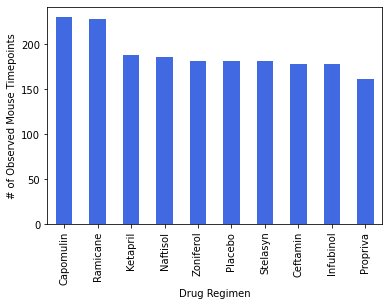

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='royalblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

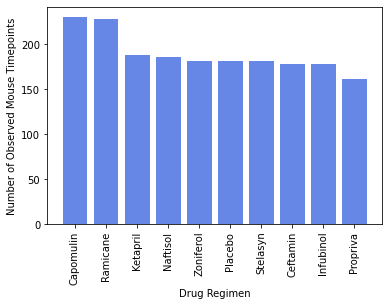

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = df['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values, color='royalblue', alpha=0.8, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

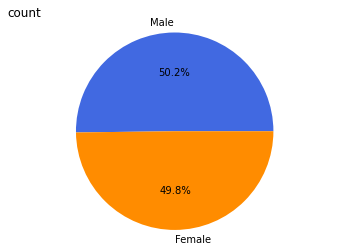

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = df[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum()) * 100
# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=360, colors=['royalblue', 'darkorange'])
plt.axis('equal')
plt.title('count',loc='left')
plt.show()

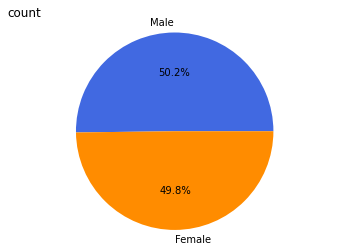

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = df[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
# Get the unique mice with their gender
gender_percentages = (gender_counts / gender_counts.sum()) * 100
# Make the pie chart
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=360, colors=['royalblue', 'darkorange'])
plt.title('count', loc='left')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(last_timepoint, df, on=['Mouse ID', 'Timepoint'], how='left')
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]

print(final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_data.append(treatment_data)
    
    # Calculate the quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


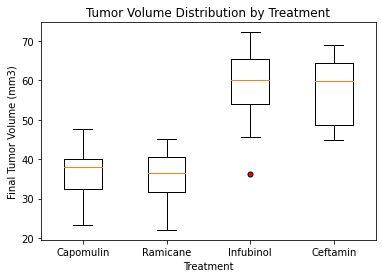

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = [final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

fig, ax = plt.subplots()
flierprops = dict(marker='o', color='r', markersize=5, markerfacecolor='r')


ax.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)

ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Treatment')
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

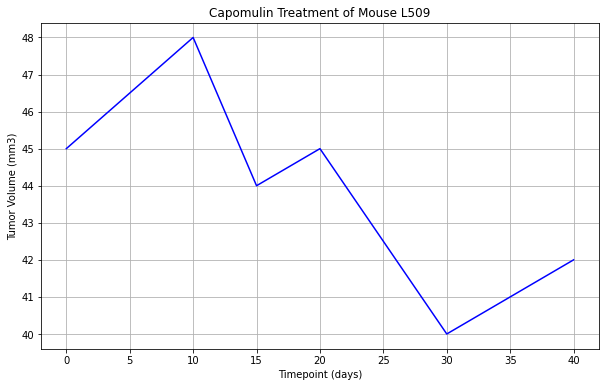

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
data = {
    'Mouse ID': ['L509', 'L509', 'L509', 'L509', 'L509', 'L509'],  # Corrected number of entries
    'Timepoint': [0, 10, 15, 20, 30, 40],  # Replace with actual time points
    'Tumor Volume (mm3)': [45, 48, 44, 45, 40, 42]  # Replace with actual tumor volumes
}

df = pd.DataFrame(data)

df_mouse = df.loc[df['Mouse ID'] == 'L509']

plt.figure(figsize=(10,6))
plt.plot(df_mouse['Timepoint'], df_mouse['Tumor Volume (mm3)'], linestyle='-', color='b')
plt.title(f'Capomulin Treatment of Mouse L509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

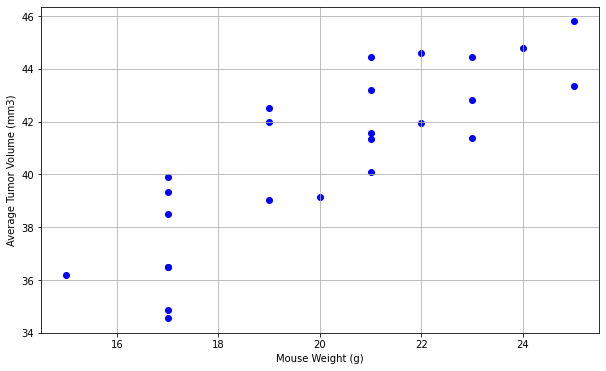

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

capomulin_avg_tumor_volume = capomulin_df.groupby('Mouse ID').agg({
    'Weight (g)': 'first',
    'Tumor Volume (mm3)': 'mean'
}).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'], color='b')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

In [18]:
mouse_metadata_path = "data/Mouse_metadata.csv"

capomulin_mice = mouse_metadata.loc[mouse_metadata['Drug Regimen'] == 'Capomulin']

print(capomulin_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
6       f966    Capomulin    Male          16          17
10      u364    Capomulin    Male          18          17
12      y793    Capomulin    Male          17          17
13      r554    Capomulin  Female           8          17
14      m957    Capomulin  Female           3          19
16      t565    Capomulin  Female          20          17
20      i738    Capomulin  Female          23          20
22      w914    Capomulin    Male          24          21
24      g288    Capomulin    Male           3          19
28      l897    Capomulin    Male          17          19
30      b742    Capomulin    Male           7          21
31      b128    Capomulin  Female           9          22
32      j246    Capomulin  Female          21          21
34      j119  

## Correlation and Regression

Correlation coefficient: 0.8419363424694719
Slope: 0.9544396890241045, Intercept: 21.552160532685015, R-squared: 0.7088568047708717


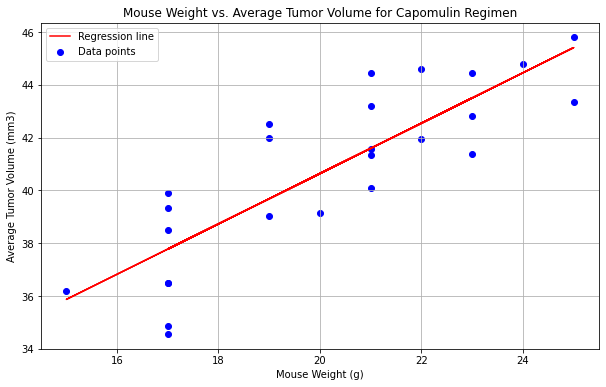

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

capomulin_avg_tumor_volume = capomulin_df.groupby('Mouse ID').agg({
    'Weight (g)': 'first',
    'Tumor Volume (mm3)': 'mean'
}).reset_index()

correlation = capomulin_avg_tumor_volume['Weight (g)'].corr(capomulin_avg_tumor_volume['Tumor Volume (mm3)'])
print(f'Correlation coefficient: {correlation}')

slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}')

reg_line = slope * capomulin_avg_tumor_volume['Weight (g)'] + intercept

plt.figure(figsize=(10,6))
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'], color='b', label='Data points')
plt.plot(capomulin_avg_tumor_volume['Weight (g)'], reg_line, color='r', label='Regression line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()